In [1]:
# We need to import these modules to get started
import os
import platform
import pca_functions as pcafunc
import numpy as np
import pandas as pd
import warnings
import imageio
from event_utils import get_events
from create_stim_table import create_stim_df
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# This patch of code just ensures we get an easy to read font size for the duration of the notebook
import matplotlib
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

In [2]:
# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"

In [4]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

# Create data cache object 
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [5]:
desired_container_id = 688678764
# Next try container ID 682734790

In [6]:
# Natural Movie One

In [20]:
mean_responses1, mean_responses2, mean_responses3 = pcafunc.get_all_relevant_tables_movie_one(desired_container_id, 30, boc)

In [21]:
transformed_data_nm1, pca_results_nm1 = pcafunc.pca_transform_data(mean_responses1, mean_responses2, mean_responses3, 12)

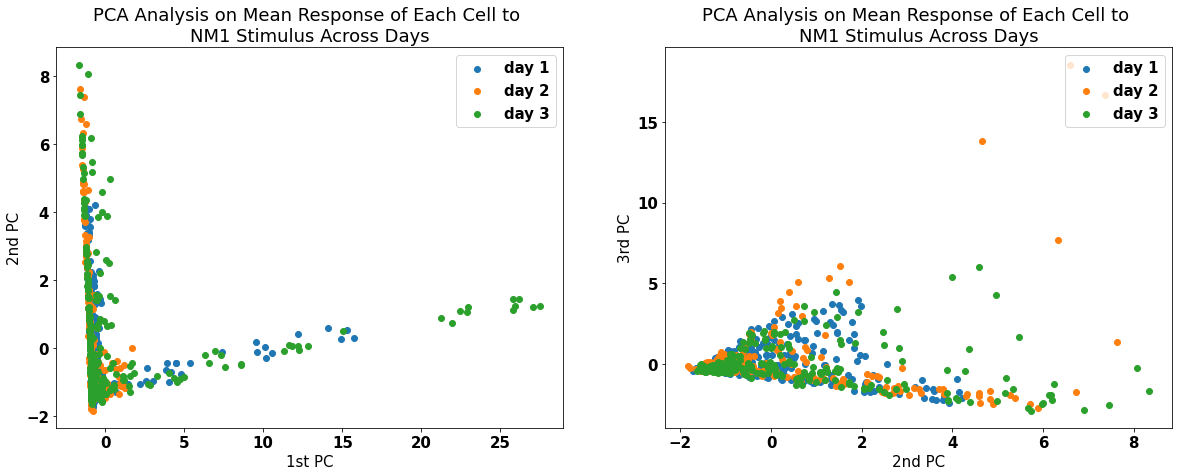

In [22]:
# PCA Model: 2D Visualization
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))

ax1.scatter(transformed_data_nm1[transformed_data_nm1.Session=="1"][0], transformed_data_nm1[transformed_data_nm1.Session=="1"][1], label="day 1")
ax1.scatter(transformed_data_nm1[transformed_data_nm1.Session=="2"][0], transformed_data_nm1[transformed_data_nm1.Session=="2"][1], label="day 2")
ax1.scatter(transformed_data_nm1[transformed_data_nm1.Session=="3"][0], transformed_data_nm1[transformed_data_nm1.Session=="3"][1], label="day 3")
ax1.set_xlabel("1st PC")
ax1.set_ylabel("2nd PC")
ax1.set_title("PCA Analysis on Mean Response of Each Cell to \nNM1 Stimulus Across Days")
ax1.legend(loc="upper right")

ax2.scatter(transformed_data_nm1[transformed_data_nm1.Session=="1"][1], transformed_data_nm1[transformed_data_nm1.Session=="1"][2], label="day 1")
ax2.scatter(transformed_data_nm1[transformed_data_nm1.Session=="2"][1], transformed_data_nm1[transformed_data_nm1.Session=="2"][2], label="day 2")
ax2.scatter(transformed_data_nm1[transformed_data_nm1.Session=="3"][1], transformed_data_nm1[transformed_data_nm1.Session=="3"][2], label="day 3")
ax2.set_xlabel("2nd PC")
ax2.set_ylabel("3rd PC")
ax2.set_title("PCA Analysis on Mean Response of Each Cell to \nNM1 Stimulus Across Days")
ax2.legend(loc="upper right")
plt.show()


In [23]:
transformed_data_nm1_session1 = transformed_data_nm1[transformed_data_nm1.Session=='1']
transformed_data_nm1_session2 = transformed_data_nm1[transformed_data_nm1.Session=='2']
transformed_data_nm1_session3 = transformed_data_nm1[transformed_data_nm1.Session=='3']

In [24]:
# Differences between sessions in PC1
diff12_nm1_pc1 = transformed_data_nm1_session1[0]-transformed_data_nm1_session2[0]
diff13_nm1_pc1 = transformed_data_nm1_session1[0]-transformed_data_nm1_session3[0]
diff23_nm1_pc1 = transformed_data_nm1_session2[0]-transformed_data_nm1_session3[0]

# Differences between sessions in PC2
diff12_nm1_pc2 = transformed_data_nm1_session1[1]-transformed_data_nm1_session2[1]
diff13_nm1_pc2 = transformed_data_nm1_session1[1]-transformed_data_nm1_session3[1]
diff23_nm1_pc2 = transformed_data_nm1_session2[1]-transformed_data_nm1_session3[1]

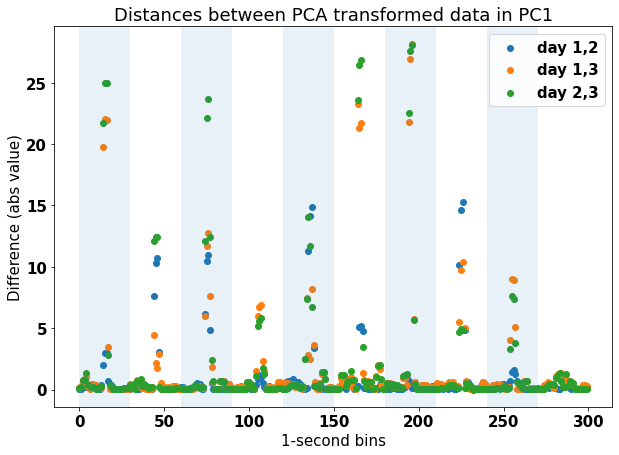

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(range(len(diff12_nm1_pc1)), abs(diff12_nm1_pc1), label = "day 1,2")
plt.scatter(range(len(diff13_nm1_pc1)), abs(diff13_nm1_pc1), label = "day 1,3")
plt.scatter(range(len(diff23_nm1_pc1)), abs(diff23_nm1_pc1), label = "day 2,3")
plt.title("Distances between PCA transformed data in PC1")
plt.xlabel("1-second bins")
plt.ylabel("Difference (abs value)")
plt.axvspan(0,30, alpha=0.1)
plt.axvspan(60,90, alpha=0.1)
plt.axvspan(120,150, alpha=0.1)
plt.axvspan(180,210, alpha=0.1)
plt.axvspan(240,270, alpha=0.1)
plt.legend()

In [13]:
mean_diff_12_nm1_pc1 = np.mean(diff12_nm1_pc1)
mean_diff_12_nm1_pc1

0.6714336936054263

In [15]:
# Look at frame differences
diff_sessions12_nm1_pc1_df = pd.DataFrame(diff12_nm1_pc1)
diff_sessions12_nm1_pc1_df = diff_sessions12_nm1_pc1_df.rename(columns={0:'difference'})
big_diff_sessions12_nm1_pc1_df = diff_sessions12_nm1_pc1_df[abs(diff_sessions12_nm1_pc1_df.difference) > 2.5]

In [16]:
big_diff_sessions12_nm1_pc1_df.index

Index([ 15,  16,  44,  45,  46,  47,  74,  75,  76,  77, 135, 136, 137, 138,
       165, 166, 167, 224, 225, 226, 227],
      dtype='int64')

In [17]:
nm_template_indices = big_diff_sessions12_nm1_pc1_df.index * 30

In [18]:
nm_template_indices
# print(nm_template_indices)
# plt.hist(np.diff(nm_template_indices))

Index([ 450,  480, 1320, 1350, 1380, 1410, 2220, 2250, 2280, 2310, 4050, 4080,
       4110, 4140, 4950, 4980, 5010, 6720, 6750, 6780, 6810],
      dtype='int64')

In [14]:
def cycle_indices(template_indices):
    adjusted_indices = []
    for index in template_indices:
        if index < 900:
            adjusted_indices.append(index)
        if index > 900 and index < 1800:
            adjusted_indices.append(index-900)
        if index > 1800 and index < 2700:
            adjusted_indices.append(index-1800)
        if index > 2700 and index < 3600:
            adjusted_indices.append(index-2700)
        if index > 3600 and index < 4500:
            adjusted_indices.append(index-3600)
        if index > 4500 and index < 5400:
            adjusted_indices.append(index-4500)
        if index > 5400 and index < 6300:
            adjusted_indices.append(index-5300)
        if index > 6300 and index < 7200:
            adjusted_indices.append(index-6300)
    return adjusted_indices

In [19]:
adjusted_indices = cycle_indices(list(nm_template_indices))

In [20]:
np.asarray(adjusted_indices)

array([450, 480, 420, 450, 480, 510, 420, 450, 480, 510, 450, 480, 510,
       540, 450, 480, 510, 420, 450, 480, 510])

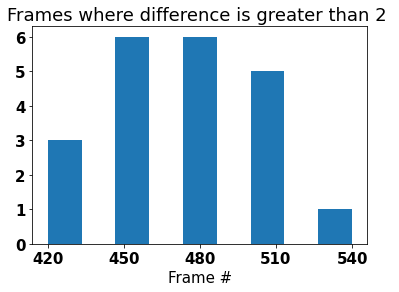

In [21]:
plt.hist(np.asarray(adjusted_indices), bins=9)
plt.xticks(np.arange(420,570,30))
plt.xlabel("Frame #")
plt.title("Frames where difference is greater than 2 ")
plt.show()

In [6]:
desired_container_id = 688678764
session_id = boc.get_ophys_experiments(experiment_container_ids=[desired_container_id], stimuli=['natural_movie_one'])[1]["id"]
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

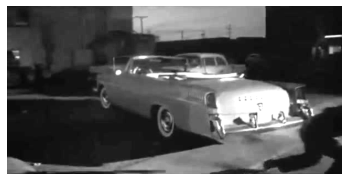

In [8]:
natural_movie_template = data_set.get_stimulus_template('natural_movie_one')
plt.imshow(natural_movie_template[420,:,:], cmap='gray')
plt.axis('off');

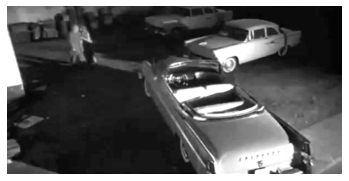

In [24]:
natural_movie_template = data_set.get_stimulus_template('natural_movie_one')
plt.imshow(natural_movie_template[510,:,:], cmap='gray')
plt.axis('off');

In [9]:
movie = natural_movie_template[420:510,:,:]

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

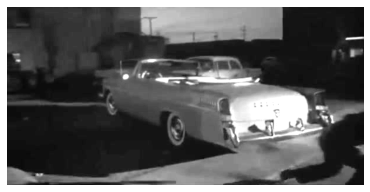

In [10]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(6.4, 3.6))
frame = 0
im = plt.imshow(movie[frame], cmap = "gray")
def update(*args):
    global frame
    im.set_array(movie[frame])
    frame += 1
    frame %= len(movie)
    #plt.title(frame)
    plt.axis('off')
    return im
ani = animation.FuncAnimation(fig, update, frames = 90)
FFwriter = animation.FFMpegWriter(fps = 30)
ani.save ('all.mp4', writer = FFwriter) #('animation.mpg', writer='ffmpeg', fps=20)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


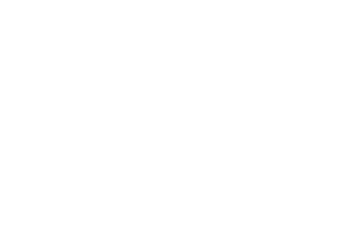

In [19]:
movie = natural_movie_template[420:510,:,:]
ani = matplotlib.animation.FuncAnimation(fig, update, frames=90, interval=33)
ani.save('../movie_second_part.gif')

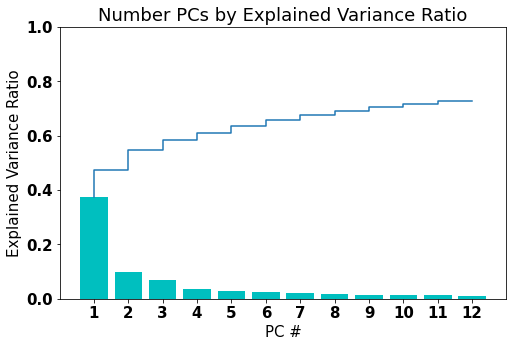

In [48]:
# Number of PCs by explained variance ratio
fig = plt.subplots(figsize=(8,5))
for i in range(1,13):
    plt.bar(i, pca_results_nm1.explained_variance_ratio[0][i-1], color="c")
plt.step(range(1,13), np.cumsum(pca_results_nm1.explained_variance_ratio[0]))
plt.ylim([0,1])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("Number PCs by Explained Variance Ratio")
plt.xlabel("PC #")
plt.ylabel("Explained Variance Ratio")
# plt.savefig(f"../{desired_container_id}_dg_pca_explained_variance.jpg", dpi=200)
plt.show()

In [49]:
pca_results_nm1.explained_variance_ratio[0][0]+pca_results_nm1.explained_variance_ratio[0][1]+pca_results_nm1.explained_variance_ratio[0][2]

0.5457105358083536

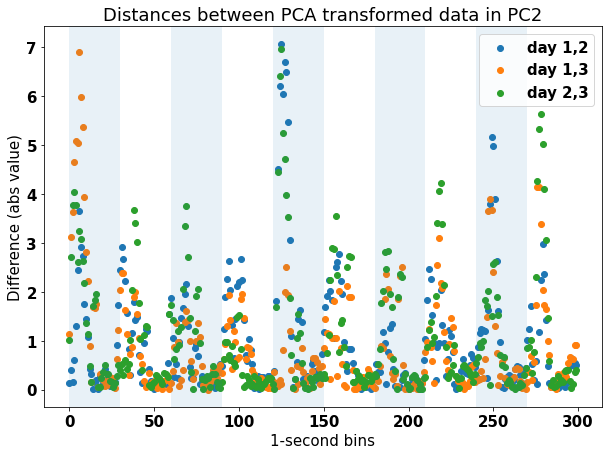

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(range(len(diff12_nm1_pc2)), abs(diff12_nm1_pc2), label = "day 1,2")
plt.scatter(range(len(diff13_nm1_pc2)), abs(diff13_nm1_pc2), label = "day 1,3")
plt.scatter(range(len(diff23_nm1_pc2)), abs(diff23_nm1_pc2), label = "day 2,3")
plt.title("Distances between PCA transformed data in PC2")
plt.xlabel("1-second bins")
plt.ylabel("Difference (abs value)")
plt.axvspan(0,30, alpha=0.1)
plt.axvspan(60,90, alpha=0.1)
plt.axvspan(120,150, alpha=0.1)
plt.axvspan(180,210, alpha=0.1)
plt.axvspan(240,270, alpha=0.1)
plt.legend()

In [26]:
mean_diff_12_nm1_pc2 = np.mean(diff12_nm1_pc2)
mean_diff_12_nm1_pc2

-0.03535666659752185

In [27]:
# Look at frame differences
diff_sessions12_nm1_pc2_df = pd.DataFrame(diff12_nm1_pc2)
diff_sessions12_nm1_pc2_df = diff_sessions12_nm1_pc2_df.rename(columns={1:'difference'})
big_diff_sessions12_nm1_pc2_df = diff_sessions12_nm1_pc2_df[abs(diff_sessions12_nm1_pc2_df.difference) > 2.5]

# Look at frame differences
diff_sessions23_nm1_pc2_df = pd.DataFrame(diff23_nm1_pc2)
diff_sessions23_nm1_pc2_df = diff_sessions23_nm1_pc2_df.rename(columns={1:'difference'})
big_diff_sessions23_nm1_pc2_df = diff_sessions23_nm1_pc2_df[abs(diff_sessions23_nm1_pc2_df.difference) > 3.5]

In [28]:
big_diff_sessions23_nm1_pc2_df.index

Index([  2,   3,   4,  38,  69, 123, 124, 125, 126, 127, 128, 129, 157, 218,
       219, 276, 277, 278, 279, 280],
      dtype='int64')

In [29]:
adjusted_indices2 = cycle_indices(list(big_diff_sessions23_nm1_pc2_df.index * 30))
np.asarray(adjusted_indices2)

array([ 60,  90, 120, 240, 270,  90, 120, 150, 180, 210, 240, 270, 210,
       240, 270])

In [30]:
np.asarray(adjusted_indices)

array([450, 480, 420, 450, 480, 510, 420, 450, 480, 510, 450, 480, 510,
       540, 450, 480, 510, 420, 450, 480, 510])

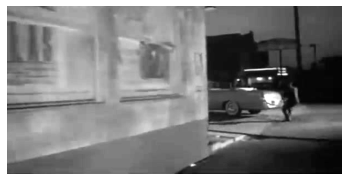

In [16]:
plt.imshow(natural_movie_template[270,:,:], cmap='gray') # 60 - 270
plt.axis('off');

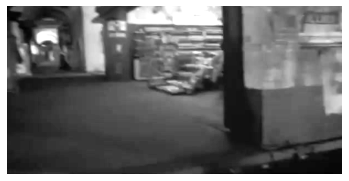

In [32]:
plt.imshow(natural_movie_template[0,:,:], cmap='gray')
plt.axis('off');

MovieWriter ffmpeg unavailable; using Pillow instead.


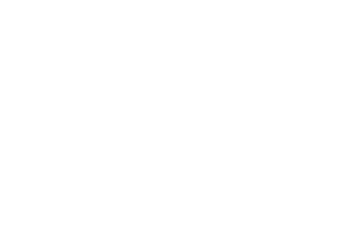

In [18]:
movie = natural_movie_template[60:270,:,:]
ani = matplotlib.animation.FuncAnimation(fig, update, frames=270 - 60, interval=33)
ani.save('../movie_first_part.gif')

In [ ]:
# Natural Movie 3 (two epochs)

In [7]:
mean_responses1, mean_responses2 = pcafunc.get_all_relevant_tables_movie_three(688678764, 30, boc)

In [8]:
transformed_data_nm3, pca_results_nm3 = pcafunc.pca_transform_data_movie_three(mean_responses1, mean_responses2, 3)

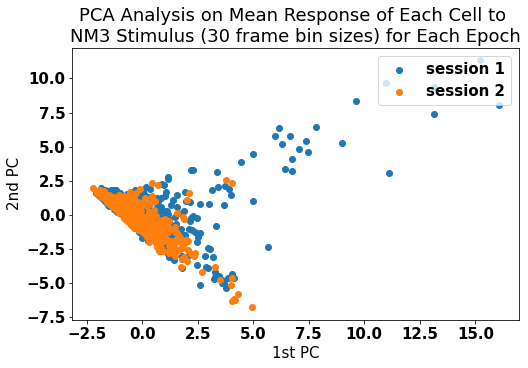

In [9]:
# PCA Model: 2D Visualization
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_nm3[transformed_data_nm3.Session=="1"][0], transformed_data_nm3[transformed_data_nm3.Session=="1"][1], label="session 1")
ax.scatter(transformed_data_nm3[transformed_data_nm3.Session=="2"][0], transformed_data_nm3[transformed_data_nm3.Session=="2"][1], label="session 2")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell to \nNM3 Stimulus (30 frame bin sizes) for Each Epoch")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_natural_movie_three_pc12.jpg", dpi=200)
plt.show()


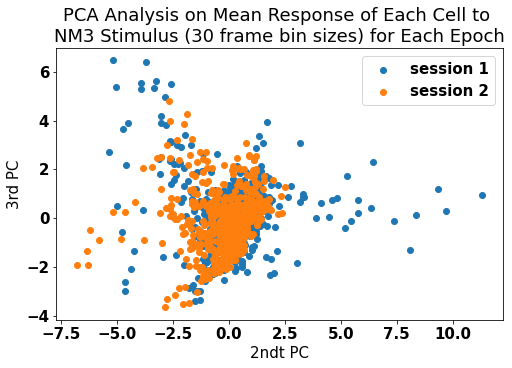

In [10]:
# PCA Model: 2D Visualization, PCs 1 and 3
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(transformed_data_nm3[transformed_data_nm3.Session=="1"][1], transformed_data_nm3[transformed_data_nm3.Session=="1"][2], label="session 1")
ax.scatter(transformed_data_nm3[transformed_data_nm3.Session=="2"][1], transformed_data_nm3[transformed_data_nm3.Session=="2"][2], label="session 2")
ax.set_xlabel("2ndt PC")
ax.set_ylabel("3rd PC")
ax.set_title("PCA Analysis on Mean Response of Each Cell to \nNM3 Stimulus (30 frame bin sizes) for Each Epoch")
plt.legend(loc="upper right")
plt.savefig(f"../results/{desired_container_id}_pca_natural_movie_three_pc23.jpg", dpi=200)
plt.show()

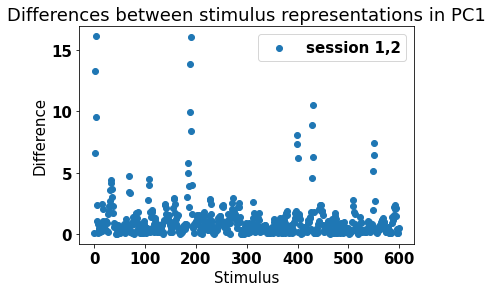

In [11]:
transformed_data_nm3_session1 = transformed_data_nm3[transformed_data_nm3.Session=='1']
transformed_data_nm3_session2 = transformed_data_nm3[transformed_data_nm3.Session=='2']

# Differences between sessions in PC1
diff_sessions12_nm3_pc1 = transformed_data_nm3_session1[0]-transformed_data_nm3_session2[0]

# Differences between sessions in PC2
diff_sessions12_nm3_pc2 = transformed_data_nm3_session1[1]-transformed_data_nm3_session2[1]

plt.scatter(range(len(diff_sessions12_nm3_pc1)), abs(diff_sessions12_nm3_pc1), label = "session 1,2")
plt.title("Differences between stimulus representations in PC1")
plt.xlabel("Stimulus")
plt.ylabel("Difference")
plt.legend()

In [12]:
mean_diff_sessions12_nm3_pc1 = np.mean(diff_sessions12_nm3_pc1)
mean_diff_sessions12_nm3_pc1

0.5181946098222073

In [13]:
diff_sessions12_nm3_pc1_df = pd.DataFrame(diff_sessions12_nm3_pc1)
diff_sessions12_nm3_pc1_df = diff_sessions12_nm3_pc1_df.rename(columns={0:'difference'})
big_diff_sessions12_nm3_pc1_df = diff_sessions12_nm3_pc1_df[abs(diff_sessions12_nm3_pc1_df.difference) > 5]

In [14]:
big_diff_sessions12_nm3_pc1_df.index

Index([  1,   2,   3,   4, 185, 188, 189, 190, 191, 398, 399, 400, 429, 430,
       431, 549, 550, 551],
      dtype='int64')

In [15]:
nm3_template_indices = big_diff_sessions12_nm3_pc1_df.index * 30
nm3_template_indices

Index([   30,    60,    90,   120,  5550,  5640,  5670,  5700,  5730, 11940,
       11970, 12000, 12870, 12900, 12930, 16470, 16500, 16530],
      dtype='int64')

In [18]:
adjusted_indices = cycle_indices(list(nm3_template_indices))
np.asarray(adjusted_indices)

array([ 30,  60,  90, 120, 250, 340, 370, 400, 430])

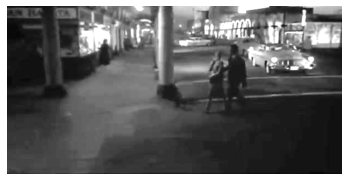

In [26]:
desired_container_id = 688678764
session_id = boc.get_ophys_experiments(experiment_container_ids=[desired_container_id], stimuli=['natural_movie_one'])[1]["id"]
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

natural_movie_template = data_set.get_stimulus_template('natural_movie_three')
plt.imshow(natural_movie_template[0,:,:], cmap='gray')
plt.axis('off');

In [20]:
natural_movie_template.shape

(3600, 304, 608)

In [ ]:
plt.scatter(range(len(diff_sessions12_nm3_pc2)), diff_sessions12_nm3_pc2, label = "session 1,2")
plt.title("Differences between stimulus representations in PC2")
plt.xlabel("Stimulus")
plt.ylabel("Difference")
plt.legend()

In [ ]:
mean_diff_sessions12_nm3_pc2 = np.mean(diff_sessions12_nm3_pc2)
mean_diff_sessions12_nm3_pc2

In [ ]:
heatmap_array_nm = np.asarray((list(mean_responses1), list(mean_responses2)))
